<a href="https://colab.research.google.com/github/anthonymoisan/Predict_Bicycle/blob/master/src/project_bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description du projet et consignes

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

Voici un descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

L'objectif du projet est de mener à bien la création d'un modèle qui pourrait théoriquement être déployé en production. Les étapes d'exploration des données, de traitement et de preprocessing ne sont bien entendu pas à négliger. Il ne s'agit pas d'une compétition de type *Kaggle*, le projet ne sera pas uniquement noté sur la performance du modèle, mais plutôt sur votre approche complète et la justification de chacun de vos choix.

Comme vu durant le cours, soyez faites attention à certains points :
- quel type de problème dois-je traiter ?
- feature engineering : est-ce que j'utilise les données correctement, toutes les données ?
- data leakage : est-ce qu'une de mes features n'est pas trop explicative ?
- ai-je bien traité toutes les données correctement ?
- est-ce que mon modèle est adapté ?
- etc, etc, etc

Soyez vigilant à expliquer et justifier votre démarche à l'aide de visualisation, de commentaires dans vos codes (pensez aux cellules markdown), etc

# Type de problème
Le problème exposé est un problème supervisé de régression car nous cherchons à expliciter le nombre de vélos loués à partir des variables explicatives du jeu de données.

# Librairies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# impossibilité de voir l'arbre de décision à travers graphviz!pip install graphviz

# Lecture du jeu de données



## Taille du jeu de données

In [2]:
df = pd.read_csv("../input/velo.csv")
print("taille du jeu de donnees :", df.shape)
df.head(10)

taille du jeu de donnees : (10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


On regarde les infos assez rapidement sur les variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## Gestion des variables catégorielles
On regarde les valeurs uniques pour identifier les variables catégorielles

In [4]:
for colname, serie in df.iteritems():
    print(colname + " has " + str(serie.drop_duplicates().shape[0]) + " unique values.")

datetime has 10886 unique values.
season has 4 unique values.
holiday has 2 unique values.
workingday has 2 unique values.
weather has 4 unique values.
temp has 49 unique values.
atemp has 60 unique values.
humidity has 89 unique values.
windspeed has 28 unique values.
casual has 309 unique values.
registered has 731 unique values.
count has 822 unique values.


In [5]:
#idnentique à df.nunique()

Sans surprise, les variables (saison, holiday, working day, weather) doivent être des variables catégorielles que nous redéfinissons comme suit avec un ordre pour season et weather en nommant explicitement les modalités

In [6]:
df["season"] = pd.Categorical(df["season"], ordered=True).rename_categories({1:'printemps', 2:'été', 3:'automne', 4:'hiver' })
df["holiday"] = pd.Categorical(df["holiday"], ordered=False)
df["workingday"] = pd.Categorical(df["workingday"], ordered=False)
df["weather"] = pd.Categorical(df["weather"], ordered=True).rename_categories({1: 'Dégagé à nuageux', 2 : 'Brouillard', 3 : 'Légère pluie ou neige', 4 : 'Fortes averses ou neiges' })
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [7]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,printemps,0,0,Dégagé à nuageux,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,printemps,0,0,Dégagé à nuageux,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,printemps,0,0,Brouillard,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,printemps,0,0,Dégagé à nuageux,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,printemps,0,0,Dégagé à nuageux,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,printemps,0,0,Dégagé à nuageux,13.12,17.425,76,0.0000,8,6,14


## Vérification sur les variables de type Count

In [8]:
df["validation count"]=(df["casual"] + df["registered"] == df["count"])
df[df["validation count"]==False]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,validation count


On se rend compte que la variable Count correspond exactement à Casual + Registered ce qui est logique aux vues des noms. Dans la suite de l'analyse, on pourra enlever du dataset "Casual" et "Registered". S'il y avait eu un problème dans les données, on aurait pu essayer d'inférer à partir des différents champs bruts la variable count mais ce n'est pas le cas rencontré (uniquement duplication d'informations) 

In [9]:
df = df.drop(["validation count", "casual", "registered"], axis=1)

## Typage des dates

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d %H:%M:%S')
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int64(2)
memory usage: 553.4 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
10881,2012-12-19 19:00:00,hiver,0,1,Dégagé à nuageux,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,hiver,0,1,Dégagé à nuageux,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,hiver,0,1,Dégagé à nuageux,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,hiver,0,1,Dégagé à nuageux,13.94,17.425,61,6.0032,129
10885,2012-12-19 23:00:00,hiver,0,1,Dégagé à nuageux,13.12,16.665,66,8.9981,88


# Exploration

## Valeurs manquantes

In [11]:
# Nombre de valeurs manquantes par variable
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

Pas de valeurs manquantes, l'information était aussi disponible via infos() dans la section précédente

## Exploration univariée

### La variable de temps

On va regarder la variable temps pour voir les plages de temps. On sait que les valeurs sont uniques en regardant info(). On extrait les mois, jours, années, heure de la date

In [12]:
df['month']=df["datetime"].apply(lambda x: x.month)
df['day'] = df["datetime"].apply(lambda x: x.day)
df['year'] = df["datetime"].apply(lambda x: x.year)
df['hour'] = df["datetime"].apply(lambda x : x.hour)
df.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,year,hour
10876,2012-12-19 14:00:00,hiver,0,1,Dégagé à nuageux,17.22,21.210,50,12.9980,218,12,19,2012,14
10877,2012-12-19 15:00:00,hiver,0,1,Dégagé à nuageux,17.22,21.210,50,19.0012,237,12,19,2012,15
10878,2012-12-19 16:00:00,hiver,0,1,Dégagé à nuageux,17.22,21.210,50,23.9994,334,12,19,2012,16
10879,2012-12-19 17:00:00,hiver,0,1,Dégagé à nuageux,16.40,20.455,50,26.0027,562,12,19,2012,17
10880,2012-12-19 18:00:00,hiver,0,1,Dégagé à nuageux,15.58,19.695,50,23.9994,569,12,19,2012,18
10881,2012-12-19 19:00:00,hiver,0,1,Dégagé à nuageux,15.58,19.695,50,26.0027,336,12,19,2012,19
10882,2012-12-19 20:00:00,hiver,0,1,Dégagé à nuageux,14.76,17.425,57,15.0013,241,12,19,2012,20
10883,2012-12-19 21:00:00,hiver,0,1,Dégagé à nuageux,13.94,15.910,61,15.0013,168,12,19,2012,21
10884,2012-12-19 22:00:00,hiver,0,1,Dégagé à nuageux,13.94,17.425,61,6.0032,129,12,19,2012,22
10885,2012-12-19 23:00:00,hiver,0,1,Dégagé à nuageux,13.12,16.665,66,8.9981,88,12,19,2012,23


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
year          10886 non-null int64
hour          10886 non-null int64
dtypes: category(4), datetime64[ns](1), float64(3), int64(6)
memory usage: 893.6 KB


On met les variables month, day, year et hour en variables catégorielles ordonnées

In [14]:
df["month"] = pd.Categorical(df["month"], ordered=True)
df["day"] = pd.Categorical(df["day"], ordered=True)
df["year"]= pd.Categorical(df["year"], ordered=True)
df["hour"]= pd.Categorical(df["hour"], ordered=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
month         10886 non-null category
day           10886 non-null category
year          10886 non-null category
hour          10886 non-null category
dtypes: category(8), datetime64[ns](1), float64(3), int64(2)
memory usage: 598.1 KB


On va représenter les variables catégorielles à travers des tableaux de contingence ou des bars plots

In [15]:
df["year"].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

On observe qu'on a 2 années avec globalement le même nombre de plages horaires comprises par année

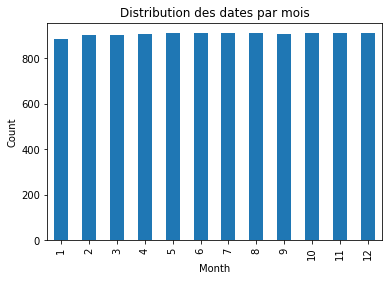

In [16]:
df["month"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution des dates par mois")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

On observe qu'on a 12 mois de représentés avec globalement le même nombre de plages horaires 

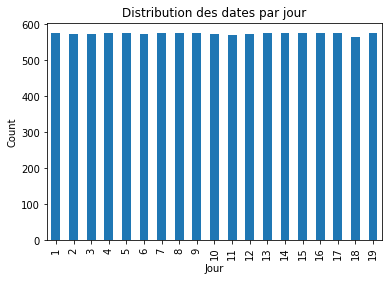

In [17]:
df["day"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution des dates par jour")
plt.xlabel("Jour")
plt.ylabel("Count")
plt.show()

On observe qu'on a uniquement les jours de 1 à 19 avec globalement le même nombre de plages horaires. Les mois sont partiellement décrits

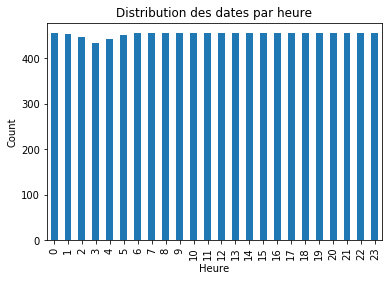

In [18]:
df["hour"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution des dates par heure")
plt.xlabel("Heure")
plt.ylabel("Count")
plt.show()

On observe qu'on a les 24heures d'une journée avec globalement le même nombre d'éléments pour chaque heure

Le nombre de pas de temps d'une heure correspond globalement au nombre d'heures d'une journée * 19 (mois partiel) * 12 (nombre de mois) * 2 années

In [19]:
24*19*12*2

10944

### La cible de notre modèle

On va s'intéresser d'abord à notre variable cible qui est le nombre de location de vélos 

In [20]:
df.describe()

,temp,atemp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132
std,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.82000,0.760000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000


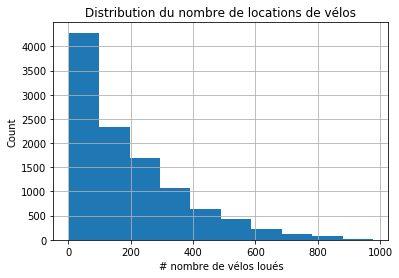

In [21]:
df["count"].hist()
plt.title("Distribution du nombre de locations de vélos")
plt.xlabel("# nombre de vélos loués")
plt.ylabel("Count")
plt.show()

* On a une distribution très calée sur la gauche avec une grande proportion de vélos faiblement loués pendant certaines heures. Cela s'apparente à une loi exponentielle.
* La médiane correspond à 145 vélos loués à l'heure. 
* On peut avoir sur certaines heures un nombre important de locations (max = 977 qui ne semble pas a priori un point atypique). 
* La moyenne (191) est légèrement supérieur à la médiane avec un écart-type important (181)

### Les autres variables quantitatives

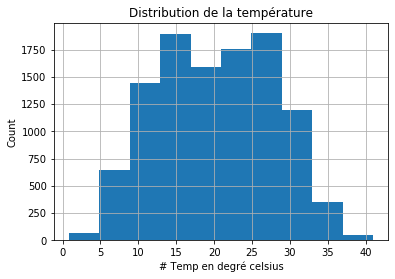

In [22]:
df["temp"].hist()
plt.title("Distribution de la température")
plt.xlabel("# Temp en degré celsius")
plt.ylabel("Count")
plt.show()

* On a une distribution qui s'apparente à une gaussienne.
* La température moyenne/médiane est de l'ordre de 20°C
* La température la plus basse est proche de 0 et celle maximum supérieur à 40°C.
Pas persuadé qu'on soit en France mais plutôt dans une ville au climat méditérranéen

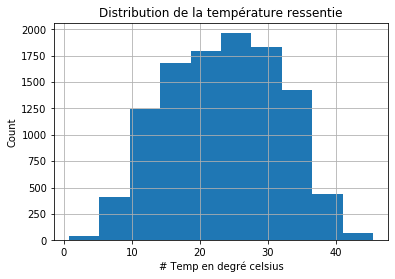

In [23]:
df["atemp"].hist()
plt.title("Distribution de la température ressentie")
plt.xlabel("# Temp en degré celsius")
plt.ylabel("Count")
plt.show()

* On a une distribution qui s'apparente à une gaussienne.
* La température ressentie moyenne/médiane est plus élevée que la température réelle
* L'écart type de la température ressentie est plus élevée que la température réelle

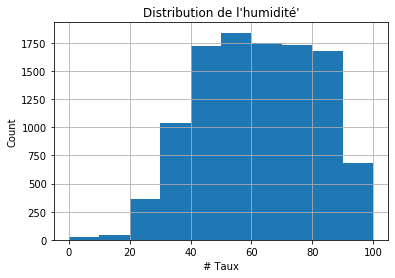

In [24]:
df["humidity"].hist()
plt.title("Distribution de l'humidité'")
plt.xlabel("# Taux")
plt.ylabel("Count")
plt.show()

* Le taux d'humidité moyen/médian est de 60%
* L'écart type est important de l'ordre de 20%.

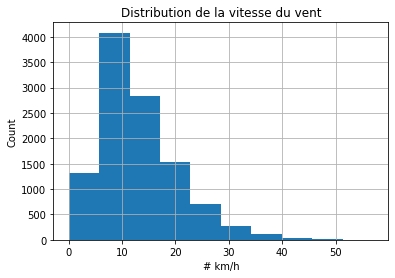

In [25]:
df["windspeed"].hist()
plt.title("Distribution de la vitesse du vent")
plt.xlabel("# km/h")
plt.ylabel("Count")
plt.show()

* La vitesse du vent moyen/médiane est de l'ordre de 12 km/h et s'apparente plus à une loi exponentielle
* On a un extrême à 56km/h mais en général un faible vent.

### Les variables catégorielles

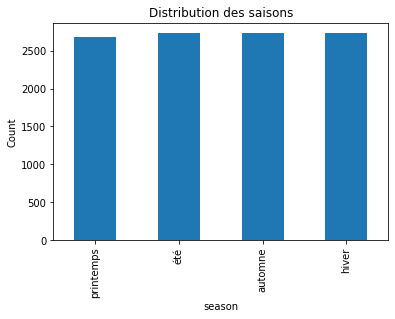

In [26]:
df["season"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution des saisons")
plt.xlabel("season")
plt.ylabel("Count")
plt.show()

Les quatre saisons sont représentées de manière homogène dans le jeu de données. Conforme à l'analyse sur les dates.

In [27]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

Très étonnant la proportion de plage de temps considérée comme pendant les vacances : très faible. 

In [28]:
df[df["holiday"]==1]["datetime"]

372     2011-01-17 00:00:00
373     2011-01-17 01:00:00
374     2011-01-17 02:00:00
375     2011-01-17 03:00:00
376     2011-01-17 04:00:00
377     2011-01-17 05:00:00
378     2011-01-17 06:00:00
379     2011-01-17 07:00:00
380     2011-01-17 08:00:00
381     2011-01-17 09:00:00
382     2011-01-17 10:00:00
383     2011-01-17 11:00:00
384     2011-01-17 12:00:00
385     2011-01-17 13:00:00
386     2011-01-17 14:00:00
387     2011-01-17 15:00:00
388     2011-01-17 16:00:00
389     2011-01-17 17:00:00
390     2011-01-17 18:00:00
391     2011-01-17 19:00:00
392     2011-01-17 20:00:00
393     2011-01-17 21:00:00
394     2011-01-17 22:00:00
395     2011-01-17 23:00:00
1658    2011-04-15 00:00:00
1659    2011-04-15 01:00:00
1660    2011-04-15 02:00:00
1661    2011-04-15 03:00:00
1662    2011-04-15 04:00:00
1663    2011-04-15 05:00:00
                ...        
9705    2012-10-08 18:00:00
9706    2012-10-08 19:00:00
9707    2012-10-08 20:00:00
9708    2012-10-08 21:00:00
9709    2012-10-08 2

Très étonnant de voir les dates qui sont considérés comme en vacance scolaire : peu en nombre. On n'est clairement pas en France mais il peut y avoir aussi un problème de données sur cette variable

In [29]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [30]:
df["workingday"].value_counts(normalize=True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

Le nombre de plages de temps correspondant à des jours travaillés (hors vacances, week-end, jours fériés) semblent cohérent en proportion

In [31]:
df["weather"].value_counts()

Dégagé à nuageux            7192
Brouillard                  2834
Légère pluie ou neige        859
Fortes averses ou neiges       1
Name: weather, dtype: int64

In [32]:
df["weather"].value_counts(normalize=True)

Dégagé à nuageux            0.660665
Brouillard                  0.260334
Légère pluie ou neige       0.078909
Fortes averses ou neiges    0.000092
Name: weather, dtype: float64

Il fait plutôt dégagé à nuageux la majorité du temps. La modalité neige ou forte averses ne contient qu'un seul élément ce qui parait assez étonnant aux vues du tableau de contingence des autres modalités (la neige apparait aussi dans la modalité 3). Aussi, nous décidons de regrouper la modalité 3 et 4 ensemble avec une modalité renommée Pluie ou Neige

In [33]:
df["weather"].replace(
    to_replace=["Légère pluie ou neige", "Fortes averses ou neiges"],
    value='Pluie ou neige',
    inplace=True
)
#il faut remettre en catégorielle la variable suite aux remplacements des valeurs et on vérifie les proportions
df["weather"] = pd.Categorical(df["weather"], ordered=True)
df["weather"].value_counts(normalize=True)

Dégagé à nuageux    0.660665
Brouillard          0.260334
Pluie ou neige      0.079001
Name: weather, dtype: float64

### Conclusion sur l'analyse univariée

On a pu voir que :
* le jeu de données est constituée de plages horaires sur 2 ans avec des mois partiellement décrits (tous les jours avant le 19). Les données sont décrites de manière homogène pour l'ensemble des saisons, des mois et des jours présents ainsi que des heures composant une journée
* la target (nombre de locations horaires de vélos) expose une distribution particulière s'apparentant à une loi exponentielle
* nous avons pu observer aussi les distributions des variables quantitatives : temp, atemp, humidity, windspeed
* certaines variables sont à enlever pour les raisons suivantes : Casual + Registered correspond à Count. 
* la variable Holiday interpelle dans les proportions.
* les données de température / humidité semblent indiquer une ville avec un degré d'humidité importante et des températures ensoleillées. 
* on a introduit du feature ingeneering en traitant les dates en découpant celles-ci en année / mois / jour / heure 

## Analyse bivariée

L'analyse bivariée va consister à regarder l'influence de différentes variables sur la variable cible.

### Variable cible fonction du temps

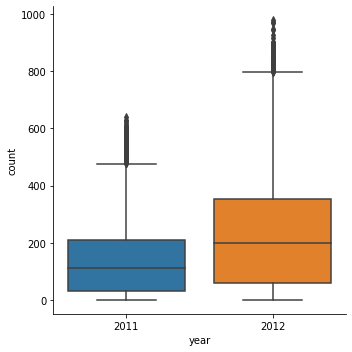

In [34]:
sns.catplot(x="year", y="count", kind="box", data=df)

On observe un usage plus important du service de vélo en 2012 par rapport à 2011 et des points atypiques qui doivent s'expliquer par des usages particuliers sur certaines heures au cours de l'année. 

In [35]:
df.groupby("year")["count"].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [36]:
df.groupby("year")["count"].std()

year
2011    133.312123
2012    208.114003
Name: count, dtype: float64

La moyenne confirme l'information de hausse entre les deux années et on peut observer une variabilité très forte sur la location horaire au cours d'une année.

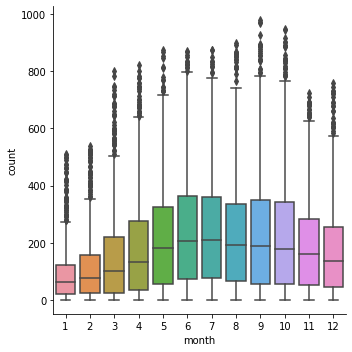

In [37]:
sns.catplot(x="month", y="count", kind="box", data=df)

On observe une utilisation plus forte de l'usage des vélos sur les mois allant de Mai à Octobre. On a aussi pour chaque mois des comportements atypiques qui peuvent s'expliquer par des événements ponctuels

In [38]:
df.groupby("month")["count"].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In [39]:
df.groupby("month")["count"].std()

month
1      95.302518
2     109.802322
3     155.352814
4     182.417619
5     189.320173
6     199.628690
7     184.857337
8     197.198461
9     208.915910
10    204.079411
11    165.420965
12    155.926050
Name: count, dtype: float64

La moyenne confirme l'interprétation en regardant les boxplot sur l'usage mensuel. On a une variabilité très forte au sein d'un mois

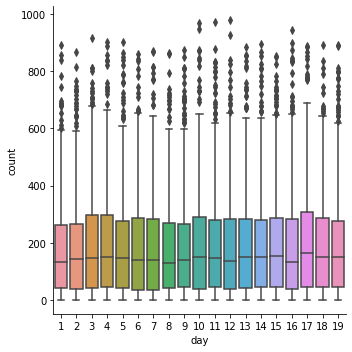

In [40]:
sns.catplot(x="day", y="count", kind="box", data=df)

On ne tire pas beaucoup d'informations avec une utilisation qui semble assez homogène par jour avec des points atypiques qui s'expliquent par des événements ponctuels. Peut-être une information plus intéressante est de voir suite à retraitement des dates, si l'usage est différent entre un lundi, mardi, ... dimanche.

In [41]:
df["dayofweek"] = df["datetime"].apply(lambda x : x.weekday())
df["dayofweek"] = pd.Categorical(df["dayofweek"]).rename_categories({0 : "Monday",1 : "Tuesday",2 : "Wednesday",3 : "Thursday",4 : "Friday", 5: "Saturday",6 : "Sunday"}) 

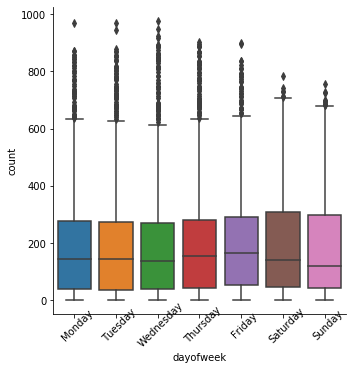

In [42]:
p = sns.catplot(x="dayofweek", y="count", kind="box", data=df)
p.set_xticklabels(rotation=45, rotation_mode="anchor")

L'intuition n'est pas vérifiée. On a une utilisation assez homogène entre les jours de la semaine avec des points atypiques

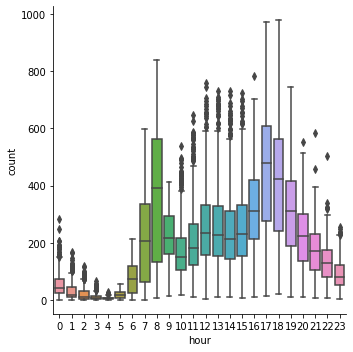

In [43]:
sns.catplot(x="hour", y="count", kind="box", data=df)

On observe :
* deux pics dans la journée pour aller travailler (8h) et à la sortie du travail (18h)
* une utilisation plus importante entre 7h et 20h que le reste de la journée
* des locations horaires relativement faible entre 23h et 6h
* des points atypiques surtout en journée

### Variables quantitatives

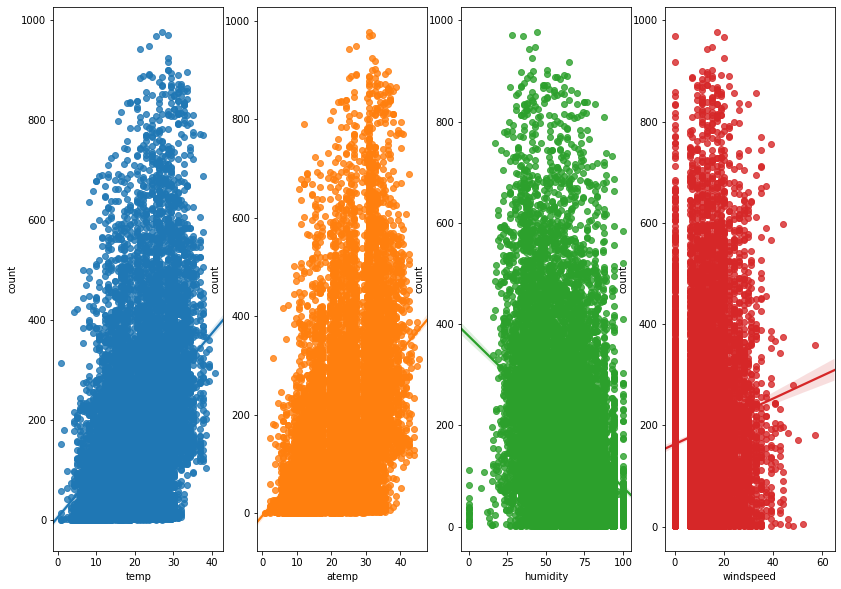

In [44]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(14,10)
sns.regplot(x="temp",y="count",data=df, ax=ax1)
sns.regplot(x="atemp",y="count",data=df,ax=ax2)
sns.regplot(x="humidity",y="count",data=df,ax=ax3)
sns.regplot(x="windspeed",y="count",data=df,ax=ax4)

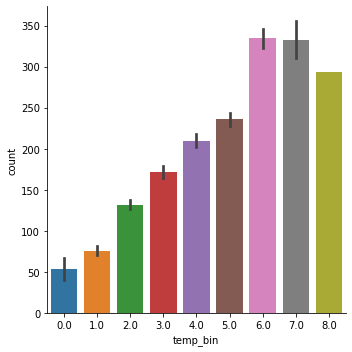

In [45]:
df['temp_bin']=np.floor(df['temp'])//5
sns.catplot(x="temp_bin",y="count",data=df,kind='bar')

En regroupant les températures par 5 degrés, on peut observer que la location horaire augmente en fonction de la température. Un pic est atteint enter 30 et 35°C.

In [46]:
df.drop("temp_bin",axis=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,year,hour,dayofweek
0,2011-01-01 00:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,81,0.0000,16,1,1,2011,0,Saturday
1,2011-01-01 01:00:00,printemps,0,0,Dégagé à nuageux,9.02,13.635,80,0.0000,40,1,1,2011,1,Saturday
2,2011-01-01 02:00:00,printemps,0,0,Dégagé à nuageux,9.02,13.635,80,0.0000,32,1,1,2011,2,Saturday
3,2011-01-01 03:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,75,0.0000,13,1,1,2011,3,Saturday
4,2011-01-01 04:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,75,0.0000,1,1,1,2011,4,Saturday
5,2011-01-01 05:00:00,printemps,0,0,Brouillard,9.84,12.880,75,6.0032,1,1,1,2011,5,Saturday
6,2011-01-01 06:00:00,printemps,0,0,Dégagé à nuageux,9.02,13.635,80,0.0000,2,1,1,2011,6,Saturday
7,2011-01-01 07:00:00,printemps,0,0,Dégagé à nuageux,8.20,12.880,86,0.0000,3,1,1,2011,7,Saturday
8,2011-01-01 08:00:00,printemps,0,0,Dégagé à nuageux,9.84,14.395,75,0.0000,8,1,1,2011,8,Saturday
9,2011-01-01 09:00:00,printemps,0,0,Dégagé à nuageux,13.12,17.425,76,0.0000,14,1,1,2011,9,Saturday


Le nombre de vélos loués dans une heure semble évoluer positivement suivant la température réelle ou ressentie. Par contre, elle évolue négativement en fonction de l'humidité. Un élément moins intuitif est qu'elle semble aussi évoluer positivement en fonction de la force du vent.

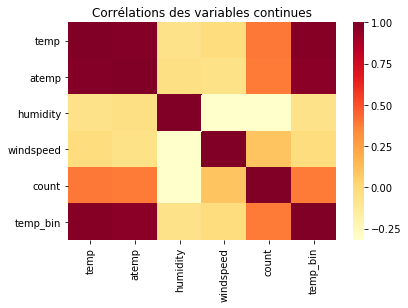

,temp,atemp,humidity,windspeed,count,temp_bin
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.984338
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.969863
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.066174
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.016415
count,0.394454,0.389784,-0.317371,0.101369,1.000000,0.389366
temp_bin,0.984338,0.969863,-0.066174,-0.016415,0.389366,1.000000


In [47]:
sns.heatmap(df.corr(), cmap="YlOrRd")
plt.title("Corrélations des variables continues")
plt.show()
df.corr()

On retrouve des informations identiques avec les corrélations entre les variables quantitatives. On n'est pas étonné de voir une corrélation très forte entre la température réelle et ressentie (une des deux variables pourra être supprimée)

### Variables catégorielles

Text(0.5, 1.0, 'Boxplot of count vs weather')

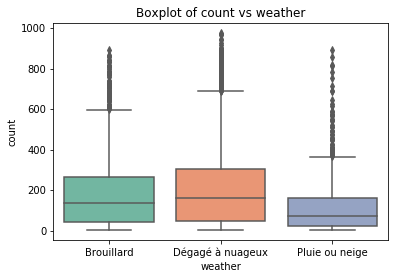

In [48]:
fig.set_size_inches(8,12)
sns.boxplot(data=df, x="weather",y="count", palette="Set2").set_title("Boxplot of count vs weather")

On peut constater :
* que l'usage en temps dégagé ou nuageux est supérieur aux usages par temps plus maussade
* des points atypiques quelque soit le temps

Text(0.5, 1.0, 'Boxplot of count vs season')

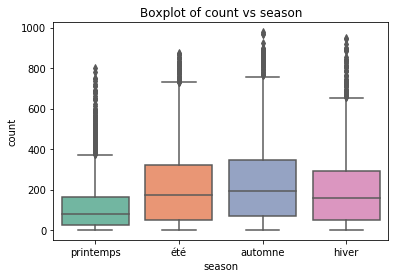

In [49]:
fig.set_size_inches(8,12)
sns.boxplot(data=df, x="season",y="count", palette="Set2").set_title("Boxplot of count vs season")

On retrouve une information déjà observée sur l'analyse des mois avec un usage plus important le printemps / été et des événements atypiques d'usage ponctuel

Text(0.5, 1.0, 'Boxplot of count vs workingday')

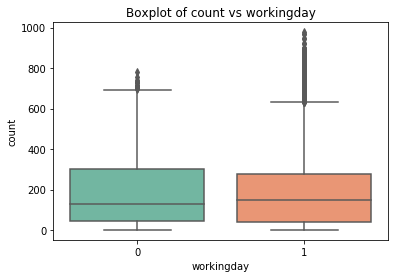

In [50]:
fig.set_size_inches(8,12)
sns.boxplot(data=df, x="workingday",y="count", palette="Set2").set_title("Boxplot of count vs workingday")

L'usage semble assez similaire entre un jour travaillé ou non. Néanmoins, on observe des points atypiques plus importants sur les jours travaillés.

Text(0.5, 1.0, 'Boxplot of count vs holiday')

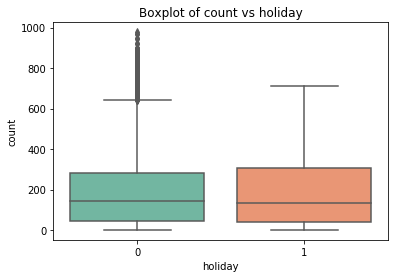

In [51]:
fig.set_size_inches(8,12)
sns.boxplot(data=df, x="holiday",y="count", palette="Set2").set_title("Boxplot of count vs holiday")

L'usage semble identique en vacances ou non. Beaucoup de points atypiques sur les plages horaires qui sont hors vacance. 

### Conclusion sur l'analyse bivariée

La target est sensible : 
* à l'année en niveau
* au mois et à la saison : on voit des saisonnalités
* à l'heure de la journée : on voit aussi une variation forte
* à la température, au taux d'humidité et dans une moindre mesure au vent

## Analyse multivariée

### Lien entre variables Temp, Humidity et Count

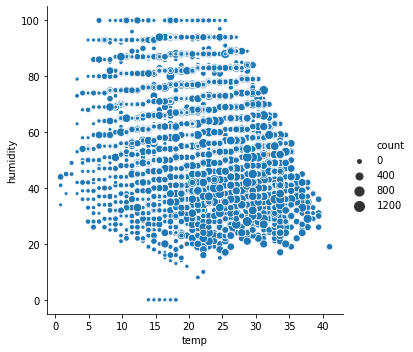

In [52]:
sns.relplot(x="temp", y="humidity", size="count", sizes=(15, 100), data=df);

On peut observer que l'usage est dans la majorité plus grande lorsque la température est clémente (supérieure à 15°C) et que le taux d'humidité est inférieure à 60%

### Lien entre variables Hour, Workingday et Count

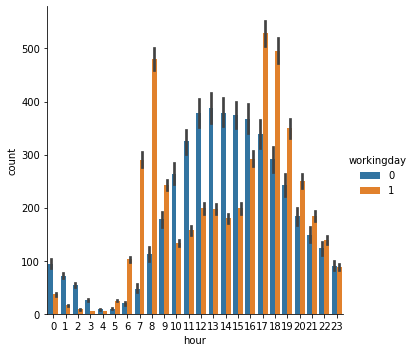

In [53]:
sns.catplot(x="hour", y="count", hue="workingday",
            kind="bar",
            data=df);

On peut contrairement à l'analyse bivariée voir l'impact de la variable workingday où on a des comportements bien différents avec :
* des pointes très marquées pour les jours travaillés (7/8h et 17 à 19h). 
* Par contre pour les jours non travaillés, on a un usage plus important entre 10h et 20h. 
* On peut aussi voir les intervalles de confiance qui semblent plutôt bons

### Lien entre variables Hour, Count, WorkingDay, Dayofweek

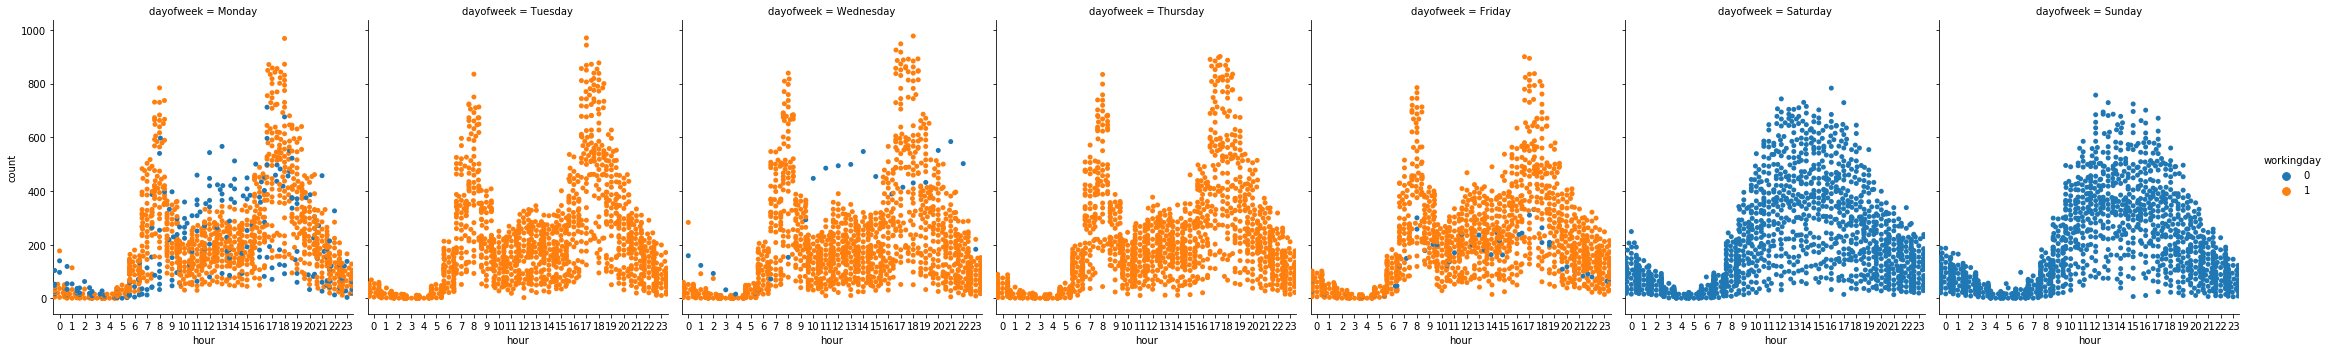

In [54]:
sns.catplot(x="hour", y="count", hue="workingday",
            col="dayofweek", aspect=.9,
            kind="swarm", data=df);

On retrouve des fonctionnements différents entre les working day. On a des motifs assez similaires du lundi au vendredi lorsque ce sont des jours travaillés avec les pointes pour aller et sortir du travail (cela pourrait s'apparenter à une composition de gaussienne autour des deux pics). Le week-end expose un fonctionnement plus gaussien autour de 14h

### Lien entre variable Hour, Count, et Season

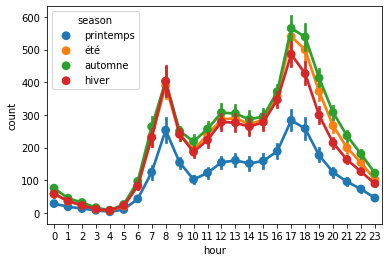

In [55]:
sns.pointplot(x="hour", y="count", hue="season", join=True, data=df);

On retrouve la saisonnalité intrajournalière avec des niveaux différents suivant les saisons avec une différence forte entre le printemps (location moindre) et les autres saisons

### Conclusion sur l'analyse multivariée

La target est sensible : 
* à des seuils de température et d'humidité
* à la variable workingday avec des fonctionnements différenciés en intraday

# Preprocessing pour scikit-learn¶

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
month         10886 non-null category
day           10886 non-null category
year          10886 non-null category
hour          10886 non-null category
dayofweek     10886 non-null category
temp_bin      10886 non-null float64
dtypes: category(9), datetime64[ns](1), float64(4), int64(2)
memory usage: 694.0 KB


## Construction des ensembles X et y à partir du dataframe

Pour notre ensemble de variables explicatives, on supprime datetime, atemp (de part sa corrélation avec temp), count (qui est la target) et on garde l'ensemble des données générées à partir des plages horaires. Dans la variable à expliquer, on a count. On a supprimé aussi la variable season par la suite car elle doit avoir des corrélations très fortes avec Mois et rend les coefficients de la régression linéaire peu interprétables si on la garde

In [57]:
X = df.drop(["atemp", "count","datetime","season"], axis = 1)
y = df["count"]
print(f"Shape de X : {X.shape}")
print(f"Shape de y : {y.shape}")
X.head(5)

Shape de X : (10886, 12)
Shape de y : (10886,)


,holiday,workingday,weather,temp,humidity,windspeed,month,day,year,hour,dayofweek,temp_bin
0,0,0,Dégagé à nuageux,9.84,81,0.0,1,1,2011,0,Saturday,1.0
1,0,0,Dégagé à nuageux,9.02,80,0.0,1,1,2011,1,Saturday,1.0
2,0,0,Dégagé à nuageux,9.02,80,0.0,1,1,2011,2,Saturday,1.0
3,0,0,Dégagé à nuageux,9.84,75,0.0,1,1,2011,3,Saturday,1.0
4,0,0,Dégagé à nuageux,9.84,75,0.0,1,1,2011,4,Saturday,1.0


## Preprocessing sur les variables catégorielles

In [58]:
categorical_features = X.columns[X.dtypes == "category"].tolist()
print(categorical_features)

['holiday', 'workingday', 'weather', 'month', 'day', 'year', 'hour', 'dayofweek']


Scikit-learn ne reconnait pas les objets de type DataFrame directement, notamment les types catégoriels. Il faut donc préparer nos données afin que les méthodes de scikit-learn puissent les interpréter. Scikit learn requiert un encodage numérique des ces variables. Nous allons donc devoir encoder nos variables explicatives catégorielles à l'aide de variables indicatrices.

In [59]:
df_dummies =  pd.get_dummies(X[categorical_features], drop_first=True)
X = pd.concat([X.drop(categorical_features, axis=1), df_dummies], axis=1)
X.head(5)

,temp,humidity,windspeed,temp_bin,holiday_1,workingday_1,weather_Dégagé à nuageux,weather_Pluie ou neige,month_2,month_3,...,hour_20,hour_21,hour_22,hour_23,dayofweek_Tuesday,dayofweek_Wednesday,dayofweek_Thursday,dayofweek_Friday,dayofweek_Saturday,dayofweek_Sunday
0,9.84,81,0.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9.02,80,0.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.02,80,0.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9.84,75,0.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9.84,75,0.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


J'avais essayé d'utiliser OneHotEncoder pour faire la dummificationet combiner avec un pipe pour la standardisation mais cela n'a pas fonctionné comme je le souhaitais. Je suis resté à la méthode plus artisanale de dummification via Panda

In [60]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(sparse =False)
#enc.fit(X)
#X = enc.transform(X)
#X

## Train, Test

Nous utilisons scikit-learn pour faire le traitement et étant donné la volumétrie du jeu de données, nous allons prendre 80% pour le train et 20% pour le test

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
print(f"Shape du X_train : {X_train.shape}")
print(f"Shape du y_train : {y_train.shape}")
print(f"Shape du X_test : {X_test.shape}")
print(f"Shape du y_test : {y_test.shape}")

Shape du X_train : (8708, 67)
Shape du y_train : (8708,)
Shape du X_test : (2178, 67)
Shape du y_test : (2178,)


## Preprocessing sur les variables numériques

In [62]:
numerical_features = df.columns[(df.dtypes == "int64")].tolist() + df.columns[(df.dtypes == "float64")].tolist()
print(numerical_features)


['humidity', 'count', 'temp', 'atemp', 'windspeed', 'temp_bin']


Certaines méthodes d'apprentissage sont sensibles aux problèmes d'échelle sur les valeurs numériques. En preprocessing, on standardise les variables numériques en retranchant leur moyenne et en divisant par l'écart type via Scikit-learn. On réalise ce traitement sur l'ensemble d'apprentissage et on applique cette standardisation sur l'ensemble de test.

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#scaled_numeric = scaler.fit_transform(df[numerical_features])
#df_numeric = pd.DataFrame(scaled_numeric,columns=numerical_features)

# Un modèle simple : la régression linéaire

Un premier modèle qui nous servira de *baseline*.

Nous allons aussi introduire l'imputation sur les données sur les données *train*, que nous appliquerons **ENSUITE** sur les données *test*.

## Modèle de regression sur Train/Test
$$y =\sum_{i=1}^{n} a_i \times x_i + b$$

In [64]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train_scaled, y_train)
y_trainPred = reg.predict(X_train_scaled)
y_testPred = reg.predict(X_test_scaled)
print(f"Score sur le train : {reg.score(X_train_scaled,y_train)}")
print(f"Score sur le test : {reg.score(X_test_scaled,y_test)}")

Score sur le train : 0.6966603007350259
Score sur le test : 0.6872988718947338


## Coefficients de la régression linéaire

Un des avantages de la régression linéaire est que nous pouvons obtenir les coefficients associés à chacune des variables. Nous pouvons voir les coefficients qui ont un impact sur le nombre de vélos loués.

Regardons ces coefficients :

In [65]:
coefficients = pd.Series(reg.coef_.flatten(), index=X.columns).sort_values(ascending=False)
coefficients

hour_17                   77.184149
hour_18                   70.731512
hour_8                    60.358008
hour_19                   49.172304
hour_16                   46.398501
year_2012                 44.010013
temp                      36.042775
hour_13                   35.903408
hour_12                   35.459085
hour_15                   34.430632
hour_7                    33.458252
hour_9                    33.402046
hour_20                   31.434534
hour_14                   31.085400
month_10                  27.897901
hour_11                   27.220438
month_5                   22.995836
month_12                  22.571148
month_11                  22.480342
hour_10                   21.994764
hour_21                   21.500673
month_9                   20.778934
month_6                   19.861328
month_4                   15.971790
hour_22                   14.386363
month_8                   14.246485
month_7                   11.009569
month_3                    9

In [66]:
print(f"ordonnee à l'origine : {reg.intercept_}")

ordonnee à l'origine : 191.19051446945335


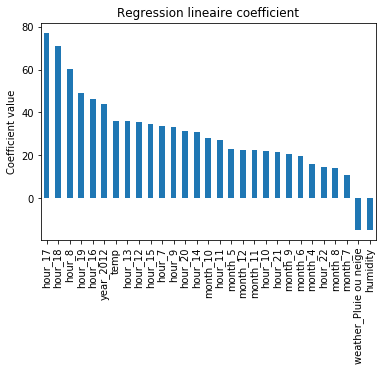

In [67]:
coefficients[np.abs(coefficients)>10].plot(kind="bar")
plt.title("Regression lineaire coefficient")
plt.ylabel("Coefficient value")
plt.show()

Pour arriver à des coefficients interprétables, on a enlevé la colinéarité entre les variables :
* en faisant une dummification à n-1 modalités
* de manière empirique en enlevant la saison qui doit être fortement corrélée avec les mois

On observe en cohérence avec notre exploration que la location à travers une régression linéaire est :
* très fortement liée aux heures importantes de la journée (les pics), 
* la variable year_2012 doit jouer sur le niveau
* la température
* les mois dans une moindre mesure
* de manière négative l'humidité et un temps pluvieux ou neige 

## Evaluation de la régression avec différentes métriques

Nous allons regarder quelques métriques associées aux problématiques de régression :
* L'erreur maximum entre la prédiction et la réalité
* La moyenne des erreurs absolus entre la prédiction et la réalité
* La moyenne des erreurs au carré entre la prédiction et la réalité (MSE)
* Le score R2 qui est le coefficient de détermination en comparant MSE et la variance. Fonction renvoyée par la méthode score de Scikit Learn

In [68]:
from sklearn import metrics


def regression_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "max_error": metrics.max_error(y_true=y, y_pred=y_pred),
            "mean_absolute_error": metrics.mean_absolute_error(y_true=y, y_pred=y_pred),
            "mean_squared_error": metrics.mean_squared_error(y_true=y, y_pred=y_pred),
            "r2_score": metrics.r2_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

In [69]:
print("Regression metrics for train data")
print(regression_metrics(y_train, y_trainPred))
print("Regression metrics for test data")
print(regression_metrics(y_test, y_testPred))

Regression metrics for train data
    max_error  mean_absolute_error  mean_squared_error  r2_score
0  445.336251            74.065709         9904.860384   0.69666
Regression metrics for test data
    max_error  mean_absolute_error  mean_squared_error  r2_score
0  401.631705            75.316481        10455.932003  0.687299


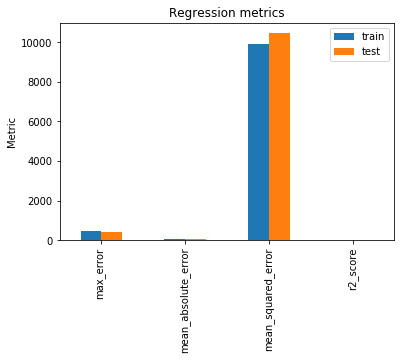

In [70]:
pd.concat(
    [
        regression_metrics(y_train, y_trainPred).T[0].rename("train"),
        regression_metrics(y_test, y_testPred).T[0].rename("test")
    ],
    axis=1).plot(kind="bar")
plt.title("Regression metrics")
plt.ylabel("Metric")
plt.show()

Il n'y a pas d'overfitting et d'underfitting et on a une qualité de la regression linéaire qui prédit très moyennement la location de vélo. Les modèles linéaires ne modélisent pas bien la série temporelle de location horaire de vélos

# Arbre de décision et visions ensemblistes

## Arbre de décision

In [71]:
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train_scaled, y_train)
y_trainPred = decisionTree.predict(X_train_scaled)
y_testPred = decisionTree.predict(X_test_scaled)
print(f"Score sur le train de l'arbre de décision : {decisionTree.score(X_train_scaled,y_train)}")
print(f"Score sur le test de l'arbre de décision : {decisionTree.score(X_test_scaled,y_test)}")


Score sur le train de l'arbre de décision : 1.0
Score sur le test de l'arbre de décision : 0.798833236103804


In [72]:
print("Regression metrics with Decision Tree for train data")
print(regression_metrics(y_train, y_trainPred))
print("Regression metrics with Decision Tree for test data")
print(regression_metrics(y_test, y_testPred))

Regression metrics with Decision Tree for train data
   max_error  mean_absolute_error  mean_squared_error  r2_score
0        0.0                  0.0                 0.0       1.0
Regression metrics with Decision Tree for test data
   max_error  mean_absolute_error  mean_squared_error  r2_score
0      604.0            48.745638         6726.505969  0.798833


On est dans un cas de surapprentissage puisque l'arbre de décision "fit" complètement à l'ensemble de train mais ne se généralise pas bien sur l'ensemble de test. Néanmoins la performance est tout de même meilleure que la régression linéaire

In [73]:
print("Feature importances : \n{}".format(decisionTree.feature_importances_))

Feature importances : 
[0.1589477  0.1319865  0.0151071  0.00339363 0.00260978 0.1038976
 0.00281154 0.00888189 0.00234929 0.00428762 0.00196801 0.00124564
 0.00049621 0.00424885 0.00063843 0.00328665 0.00590291 0.00434675
 0.00610683 0.00240545 0.00076644 0.00102704 0.00069677 0.00174652
 0.00068029 0.00126436 0.00045349 0.00185452 0.00105602 0.00140397
 0.0018916  0.00132106 0.00096006 0.00154712 0.00188719 0.00195452
 0.00155848 0.08033948 0.01215043 0.01270887 0.01042336 0.0115838
 0.00919149 0.0051793  0.01852149 0.05770382 0.01466217 0.00542804
 0.00621676 0.00544976 0.00457187 0.00399587 0.00471555 0.0146262
 0.08115913 0.07576701 0.03404442 0.01337288 0.00626286 0.00457979
 0.00597212 0.00112946 0.00132988 0.00122658 0.00361744 0.00450657
 0.00257579]


In [74]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)

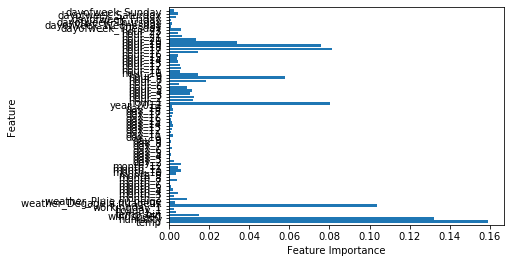

In [75]:
plot_feature_importances(decisionTree)

On ne voit pas véritablement les features importantes dans la régression réalisée sur l'arbre aux vues de la dimension de nos variables explicatives. On va filtrer les valeurs supérieures à 0.03 pour identifier les variables qui ont un poids dans la prédiction de la cible

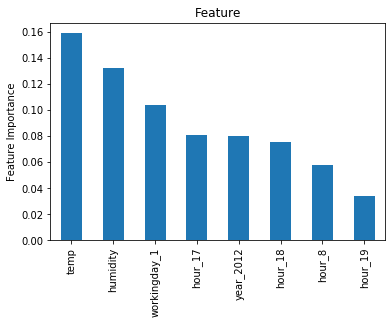

In [76]:
featuresImportance = pd.Series(decisionTree.feature_importances_.flatten(), index=X.columns).sort_values(ascending=False)
featuresImportance[(featuresImportance)>0.03].plot(kind="bar")
plt.title("Feature")
plt.ylabel("Feature Importance")
plt.show()

On retrouve des éléments par rapport à l'analyse exploratoire avec une importance donnée à la température, l'humidité, le fait de travailler ou non (fonctionnement différent), les heures de pointes et l'année.

In [77]:
for depth in range(5,20):
    decisionTreeMaxDepth = DecisionTreeRegressor(max_depth=depth)
    decisionTreeMaxDepth.fit(X_train_scaled, y_train)
    print(f"Max depth : {depth}")
    print(f"Score sur le train de l'arbre de décision : {decisionTreeMaxDepth.score(X_train_scaled,y_train)}")
    print(f"Score sur le test de l'arbre de décision : {decisionTreeMaxDepth.score(X_test_scaled,y_test)}")

Max depth : 5
Score sur le train de l'arbre de décision : 0.5073505851769136
Score sur le test de l'arbre de décision : 0.5150356097260289
Max depth : 6
Score sur le train de l'arbre de décision : 0.5817063202915151
Score sur le test de l'arbre de décision : 0.5612229629189314
Max depth : 7
Score sur le train de l'arbre de décision : 0.6386863908792977
Score sur le test de l'arbre de décision : 0.6133997585722333
Max depth : 8
Score sur le train de l'arbre de décision : 0.6934785468462568
Score sur le test de l'arbre de décision : 0.6579733323140247
Max depth : 9
Score sur le train de l'arbre de décision : 0.7413012585101724
Score sur le test de l'arbre de décision : 0.6931762439893487
Max depth : 10
Score sur le train de l'arbre de décision : 0.7779675322740819
Score sur le test de l'arbre de décision : 0.7214636655970577
Max depth : 11
Score sur le train de l'arbre de décision : 0.8082190012493902
Score sur le test de l'arbre de décision : 0.7285983297458308
Max depth : 12
Score sur 

On observe assez vite le surapprentissage lorsqu'on augmente la profondeur de l'arbre

Avantages : 
* On peut contrôler la complexité de l'arbre en jouant sur des paramètres avec la prondeur ou des stratégies d'élagage
* Interprétabilité des décisions
* Pas de problématique de prise en compte des échelles différentes entre les variables (même si dans notre cas, nous travaillons sur des données standardisées)

Inconvénient majeur :
* Même en jouant sur la complexité de l'arbre, un arbre tend au surapprentissage et fournit de piètre performance de généralisation

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
nbTree = 100
print(f"Nombre d'arbres considérés : {nbTree}")
for depth in [5,10,15,20,30, 40]:
    randomForest = RandomForestRegressor(n_estimators=nbTree, random_state=2, max_depth=depth)
    randomForest.fit(X_train_scaled, y_train)
    print(f"--- Max depth : {depth}")
    print(f"---------Score sur le train avec RandomForest : {randomForest.score(X_train_scaled,y_train)}")
    print(f"---------Score sur le test avec RandomForest : {randomForest.score(X_test_scaled,y_test)}")

Nombre d'arbres considérés : 100
--- Max depth : 5
---------Score sur le train avec RandomForest : 0.5739330010780577
---------Score sur le test avec RandomForest : 0.579114382200872
--- Max depth : 10
---------Score sur le train avec RandomForest : 0.8243932929443558
---------Score sur le test avec RandomForest : 0.7906043695555669
--- Max depth : 15
---------Score sur le train avec RandomForest : 0.9181913751319231
---------Score sur le test avec RandomForest : 0.8651550297951555
--- Max depth : 20
---------Score sur le train avec RandomForest : 0.962065273566141
---------Score sur le test avec RandomForest : 0.8961058477372902
--- Max depth : 30
---------Score sur le train avec RandomForest : 0.9858564647268058
---------Score sur le test avec RandomForest : 0.9100946410815954
--- Max depth : 40
---------Score sur le train avec RandomForest : 0.9866416709987949
---------Score sur le test avec RandomForest : 0.9105723838072377


On observe avec Random Forest une amélioration du score fonction de la profondeur considérées avec un surapprentissage si celle-ci devient importante. Dans le cas actuel, une profondeur de 15 semble cohérente

## GridSearch et Validation croisée

Nous allons creuser un peu plus loin afin d'améliorer RandomForest en optimisant les hyperparamètres du modèle. Pour ce faire nous allons procéder par validation croisée avec 5 plis sur l'ensemble d'apprentissage. 
A l'aide de celle-ci, nous allons chercher quel(s) paramètre(s) nous donne(nt) le meilleur score et enfin nous évaluerons la qualité du modèle sur le jeu de données test.

Les paramètres que nous allons chercher à optimiser dans RandomForest sont :
* le paramètre max_depth qui correspond à la profondeur de l'arbre 
* le nombre d'arbres à considérer dans la forêt
* le nombre de features maximale à considérer

In [79]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
params = [{"max_depth": [10,15,20], "n_estimators": [100,200,300,500], "max_features": [12, 15, 20, 25]}]

gridSearchCV = GridSearchCV(
    RandomForestRegressor(),
    params,
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearchCV.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': [10, 15, 20],
     

In [80]:
print("Score sur le test : {:.2f}".format(gridSearchCV.score(X_test_scaled,y_test)))

Score sur le test : 0.89


In [81]:
print("Best parameters : {}".format(gridSearchCV.best_params_))
print("Best cross-validation score : {:.2f}".format(gridSearchCV.best_score_))

Best parameters : {'max_depth': 20, 'max_features': 25, 'n_estimators': 300}
Best cross-validation score : 0.87


In [82]:
print("Best estimator:\n{}".format(gridSearchCV.best_estimator_))

Best estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=25, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


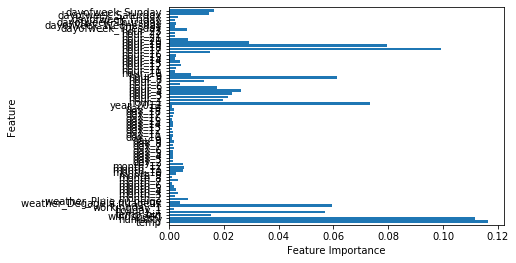

In [83]:
plot_feature_importances(gridSearchCV.best_estimator_)

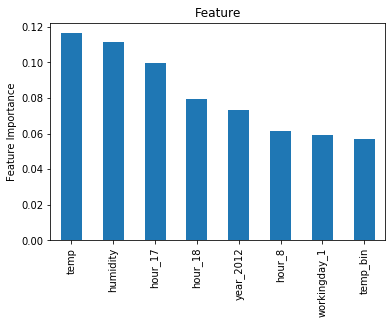

In [84]:
featuresImportance = pd.Series(gridSearchCV.best_estimator_.feature_importances_.flatten(), index=X.columns).sort_values(ascending=False)
featuresImportance[(featuresImportance)>0.03].plot(kind="bar")
plt.title("Feature")
plt.ylabel("Feature Importance")
plt.show()

A travers une validation croisée et un grid search, on obtient un paramétrage via Random Forest et on peut visualiser les variables qui ont de l'importance. On retrouve des variables explicatives en lien avec notre analyse exploratoire. On est aussi dans un cas où il n'y a pas de surapprentissage. 

In [85]:
y_testPred = gridSearchCV.best_estimator_.predict(X_test_scaled)
print("Regression metrics pour la forêt aléatoire optimisée for test data")
print(regression_metrics(y_test, y_testPred))

Regression metrics pour la forêt aléatoire optimisée for test data
    max_error  mean_absolute_error  mean_squared_error  r2_score
0  473.932759            41.470227         3747.798975  0.887916


# Conclusion

## Sur le travail réalisé
* L'analyse univariée et multivariée ont permis de mettre en évidence des liens entre les variables explicatives et à expliquer
* Le featuring Ingeenering a été un travail réalisé sur les dates pour essayer de voir les liens avec la variable à prédire.
* Les modèles linéaires ne se comportent pas très bien car le comportement de la série temporelle n'est pas linéaire.
* Un modèle basé sur des arbres de décision permet d'obtenir des meilleurs résultats par rapport à la regression linéaire. Une optimisation des paramètres a pu être mise en oeuvre via validation croisée et grille de recherche

## Sur les perspectives
* Sur le code : la mise en place de Pipe avec l'utilisation de OneHotEncoder et StandardScaler.
* Sur les modèles : tester d'autres modèles pour améliorer la prévision. On peut penser à une régression polynomiale ou boosting d'arbres de régression, ou des modèles traitant spécifiquement de séries temporelles.
* Un traitement des points atypiques pourrait peut-être aussi améliorer les prédictions.